## CO2 emission en la generacion electrica Argentina
Contexto empresarial. Imaginemos que me desarrollo como analista en YPF, una empresa de energía que participa activamente en la generación de electricidad en Argentina. Me han asignado un proyecto en el que debo utilizar datos históricos de emisiones de dióxido de carbono (CO2) de Our World in Data y datos de generación de electricidad por tipo de combustible y por fuente de generación en Argentina a lo largo del tiempo. El objetivo del proyecto es proyectar las emisiones de CO2 provenientes de la generación de electricidad en Argentina para los próximos años.

La empresa está interesada en conocer la evolución de las emisiones de dióxido de carbono en la generación de electricidad en el país, ya que esto le permitirá anticipar la demanda de energía y planificar su estrategia de producción para cumplir con las regulaciones ambientales y satisfacer la creciente demanda energética de los hogares y empresas en Argentina.

Problema comercial. Como analista de datos, mi objetivo es utilizar las fuentes de datos disponibles para desarrollar modelos precisos que permitan proyectar las emisiones de CO2 de la generación de electricidad en Argentina para los próximos años. A partir de estos modelos, podré identificar las tendencias históricas y futuras de las emisiones de CO2, lo que permitirá a YPF planificar sus operaciones de generación de energía de manera más efectiva y sostenible.

**Contexto analítico.**

Tenemos estas dos fuentes de informacion principales y varias secundarias:

1. "owid-co2-data" contiene datos y metricas relacionados a emisiones de CO2 y de otros gases de efecto invernadero, energia, para todos los paises del mundo.

2. "electricidad_argentina" contiene informacion relevante sobre la generacion y consumo de electricidad en argentina, elaborada sobre la base de datos de CAMMESA.

A partir del analisis de los datos y del desarrollo de un modelo basico que relaciona las emisiones de CO2 de la generacion electrica con el nivel de actividad, medida a traves del Estimador Mensual de Actividad Economica (EMAE) se pueden obtener los siguientes **insigths.**

- Países que más han contribuido al acumulado de emisiones de CO2 a lo largo de la historia: China, Estados Unidos, países de la Unión Europea, India, Canadá, Brasil, países del sur de África y Reino Unido.

- Relación entre nivel de emisiones, Producto Interno Bruto (PIB) y población para este grupo de países: La relación entre el PIB y las emisiones de CO2 parece ser más fuerte que la relación con la población. Aunque los países con mayor población tienden a tener mayores emisiones totales debido al mayor número de personas, algunos países con un nivel de PIB más alto tienen emisiones per cápita más altas. Esto indica que los habitantes de países menos desarrollados emiten menos CO2 per cápita que aquellos en países más desarrollados.

- Distribución de las emisiones según deciles de PIB: En línea con la relación positiva entre el PIB y las emisiones per cápita, se observa que a medida que aumenta el decil de ingreso (PIB), también aumentan en promedio las emisiones. Es importante destacar que los deciles superiores de la distribución presentan una mayor dispersión de las emisiones. Hay países de altos ingresos que emiten la misma cantidad de CO2 per cápita que países en el decil 1.

- Evolución de las emisiones de Argentina Las emisiones de CO2 en Argentina han seguido aumentando desde el inicio de la serie, alcanzando un máximo antes de la pandemia. Aunque las emisiones pospandemia aún no han superado los niveles previos a la pandemia.

- Composición de las emisiones según el tipo de combustible: Hasta el año 2000, el petróleo fue la principal fuente de emisiones en Argentina. A partir de ese año, el gas comienza a superar al petróleo como el principal combustible en términos de incidencia año tras año, lo cual está directamente relacionado con su papel predominante en la matriz energética del país.

- Combustible que más ha contribuido a las emisiones acumuladas de CO2: Aunque el gas ha experimentado una dinámica importante en los últimos años, en términos acumulados aún no ha superado al stock de emisiones generadas por el petróleo en Argentina.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly
import plotly.express as px
import statsmodels
import plotly.graph_objects as go

**1. Analisis Exploratorio (EDA). CO2 emissions en el mundo y Argentina.**

En este primer dataset (owid-co2-data) se detallan datos sobre emisiones de gases de efecto invernadero a nivel mundial. A partir del mismo pude responder las siguientres preguntas:

Que paises son los que mas contribuyeron en perspectiva historica al acumulado de emisiones de CO2 actual.
Como se relaciona el nivel de emisiones con el Producto Bruto y con la Poblacion para este mix de paises
Como se distribuyen las emisiones segun deciles de GDP?
En el caso de Argentina me permitio responder:

Como evolucionaron las emisiones de Argentina hasta la actualidad?
Como se componen estas emisiones segun el tipo de combustible o industria en cada momento del tiempo?
Cual es el combustible que mas contribuyo a las emisiones de co2 acumuladas?

In [2]:
#Cargo df sobre emisiones owid-co2-data
raw=pd.read_excel(r"C:\Users\Bruno\Desktop\Curso Data Science\Dataframes\owid-co2-data.xlsx")
raw

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


Antes de comenzar el análisis, es importante identificar las variables de interés y verificar si hay datos faltantes. A continuación, se presentan algunos detalles relevantes sobre el conjunto de datos:

- El conjunto de datos contiene 46,523 filas.
- La variable "Country" representa el país donde se generan las emisiones.
- La variable "GDP" corresponde al Producto Interno Bruto (PIB) medido en dólares internacionales (internacional-$). Se utiliza la referencia de precios de 2011 para ajustar por cambios de precios a lo largo del tiempo (inflación) y diferencias de precios entre los países. El PIB se calcula multiplicando el PIB per cápita por la población.
- La variable "cumulative_co2" indica las emisiones totales acumuladas de dióxido de carbono (CO₂) basadas en la producción, excluyendo los cambios de uso del suelo. Estas emisiones se miden en millones de toneladas y no consideran las emisiones incorporadas en bienes comerciados.
- La variable "population" representa la población del país correspondiente.
- La variable "co2" indica el número total anual de emisiones basadas en la producción de dióxido de carbono (CO₂), excluyendo los cambios de uso del suelo. Estas emisiones se miden en millones de toneladas.
- Las variables "coal_co2", "flaring_co2", "gas_co2", "oil_co2", "other_industry_co2" y "cement_co2" representan las emisiones acumuladas de CO₂ provenientes del carbón, la quema, el gas, el petróleo, otras industrias y el cemento, respectivamente.

Es importante tener en cuenta que la variable "Country" tiene 39,862 datos no nulos para los códigos ISO, lo cual se debe a la presencia de agrupamientos en la variable "Country" que no cuentan con códigos ISO, como la Unión Europea, entre otros.

En base a esto, dado que tenemos un panel de datos, la correccion por datos nulos debe tener en cuenta el pais (**country**) y el año (**year**). Antes de eso me quedo solo con las variables que me interesan para el analisis.

In [3]:
#me quedo con las var mas relevantes
raw = raw[['country','iso_code','gdp','year','cumulative_coal_co2','cumulative_flaring_co2','cumulative_gas_co2',
           'cumulative_luc_co2','cumulative_oil_co2','cumulative_other_co2','cumulative_cement_co2','cumulative_co2', 
           'population', 'co2', 'coal_co2','flaring_co2', 'gas_co2', 'oil_co2','other_industry_co2', 'cement_co2']]

df_procesado = raw.copy()

df_procesado = df_procesado.dropna(subset=['iso_code'])
df_procesado = df_procesado.rename(columns={"iso_code": "country_1"})
df_procesado = df_procesado.dropna(subset=['country_1'], axis=0, inplace=False)

# ordeno los datos por país y año
df_procesado = df_procesado.sort_values(['country', 'year'])

In [4]:
# interpolo los valores faltantes de las variables seleccionadas
vars_to_interpolate = ['cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 
                       'cumulative_oil_co2', 'cumulative_other_co2', 'cumulative_co2', 'population', 'co2', 'coal_co2',
                       'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2', 'gdp']
"""
group_cols = ['country', 'year']
df_procesado[vars_to_interpolate] = df_procesado.groupby(group_cols)[vars_to_interpolate].apply(lambda group: group.interpolate(method='nearest'))
"""

# Ahora relleno los valores faltantes con el último valor válido para cada país a partir de 2018
df_procesado.loc[df_procesado['year'] >= 2018, vars_to_interpolate] = df_procesado.loc[df_procesado['year'] >= 2018].groupby('country')[vars_to_interpolate].fillna(method='ffill')

df_procesado = df_procesado.sort_values(['year', 'country'])

Con el objetivo de simplificar el conjunto de datos sin perder información relevante, se realizará una selección de países que representen la mayor parte de las emisiones acumuladas, junto con Argentina. Según el análisis realizado por Our World in Data, los principales emisores son los siguientes:

1. China
2. Estados Unidos
3. Países de la Unión Europea (considerados en conjunto)
4. India
5. Canadá
6. Brasil
7. Países del sur de África (considerados en conjunto)
8. Reino Unido

Además de estos países, se incluirá a Argentina. Los demás países se agruparán bajo la categoría "Resto". De esta manera, se reducirá la complejidad del DataFrame sin perder información relevante para el análisis.

In [5]:
import pycountry

# Códigos ISO de los países de la UE y del sur de Africa
eu_countries = ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE']
eu_country_codes = [pycountry.countries.get(alpha_2=i).alpha_3 for i in eu_countries]
sa_countries = ['ZAF', 'BWA', 'LSO', 'NAM', 'SWZ']
resttop_countries = {'CHN', 'USA', 'IND', 'CAN', 'BRA', 'ZAF', 'GBR', 'ARG'}

# Diccionario que asocie cada país con su grupo
country_groups = {}
for country in pycountry.countries:
    if country.alpha_2 in eu_countries:
        country_groups[country.name] = 'EU'
    elif country.alpha_3 in sa_countries:
        country_groups[country.name] = 'SA'
    elif country.alpha_3 in resttop_countries:
        country_groups[country.name] = country.alpha_3
    else: 
        country_groups[country.name] = 'Resto'

# Columna con el grupo de cada país
df_procesado['country_2'] = df_procesado['country'].map(country_groups)

# Dataframe editable, seteo el indice temporal
graficos_df=df_procesado.copy()
graficos_df['year'] = pd.to_datetime(graficos_df['year'], format='%Y')
graficos_df.set_index('year', inplace=True)


La variable de mayor interes o "target" en este caso es la variable CO2, que tiene las emisiones de CO2 año a año por pais. Si seleccionamos un año, por ejemplo 2021 (ya que tenemos datos de panel) vemos que los datos tienen alta dispersion (histograma) por lo que podemos agrupar por los primeros 10 emisores. Si consideramos outliers la distribucion de co2 se encuentra entre 0 y +10.000 M toneladas, al quitarlos el maximo y minimo del target esta entre 0 y 140 M toneladas.

La media de se encunetra en torno a las 20 Millones de toneladas anuales.

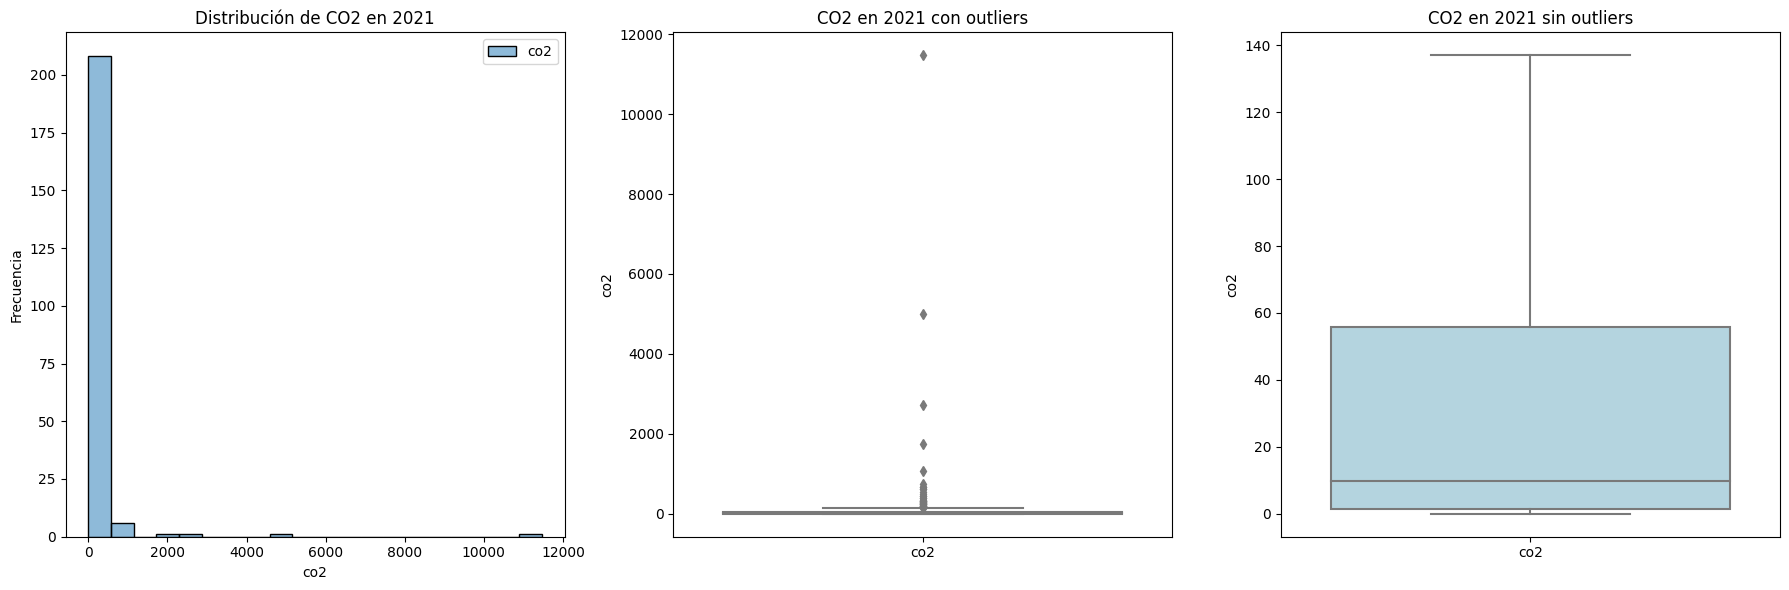

In [6]:
subset2021 = df_procesado[df_procesado['year'] == 2021].dropna(subset=['co2'])[['co2']]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

sns.histplot(data=subset2021, ax=ax1, bins=20)
ax1.set_title('Distribución de CO2 en 2021')
ax1.set_xlabel('co2')
ax1.set_ylabel('Frecuencia')

#con outliers
sns.boxplot(data=subset2021, ax=ax2, color='lightblue')
ax2.set_title('CO2 en 2021 con outliers')
ax2.set_ylabel('co2')

#sin outliers
sns.boxplot(data=subset2021, ax=ax3, color='lightblue', showfliers=False)
ax3.set_title('CO2 en 2021 sin outliers')
ax3.set_ylabel('co2')

plt.tight_layout()
plt.show()

Ahora procedemos a analizar las emisiones de CO2 por país. Para simplificar, se mostrarán únicamente los cinco mayores y los cinco menores emisores. El país con las emisiones más altas es China, seguido por Estados Unidos, mientras que las emisiones más bajas se encuentran en la Antártida. 

Dos aspectos a tener en cuenta en este caso son la poblacion y el GDP. En terminos per capita las emisiones de EE.UU casi duplican las de China.

In [7]:
tabla_df = df_procesado[df_procesado['year'] == 2018].sort_values(['co2'], ascending=False).reset_index(drop=True)
columnas_deseadas = ["country", "co2", "population", "gdp"]
tabla_df = tabla_df[columnas_deseadas]

tabla_df = tabla_df.rename(columns={"country": "Pais", "co2": "Emisiones anuales de CO2", "population": "Poblacion", "gdp": "PIB"})

tabla_df['Emisiones anuales de CO2'] = tabla_df['Emisiones anuales de CO2'].astype(str).str.replace('.0', '')
tabla_df['Poblacion'] = tabla_df['Poblacion'].apply(lambda x: '{:.0f}'.format(x / 1000000) if pd.notnull(x) and np.isfinite(x) else x)
tabla_df['PIB'] = tabla_df['PIB'].apply(lambda x: '{:.0f}'.format(x / 1000000) if pd.notnull(x) and np.isfinite(x) else x)

tabla_df.head(10).style.background_gradient(cmap='Reds', subset=['Emisiones anuales de CO2'])


,Pais,Emisiones anuales de CO2,Poblacion,PIB
0,China,10353.877,1417,18151620
1,United States,5376.657,332,18140646
2,India,2600.447,1369,8835758
3,Russia,1700.453,146,3613410
4,Japan,1143.412,126,4867011
5,Germany,754.408,83,3885961
6,Iran,700.938,86,1398996
7,South Korea,670.169,52,1958392
8,Saudi Arabia,626.191,35,1677339
9,Indonesia,603.657,267,3075456


**Que paises son los q mas aportaron a lo largo del tiempo a las emisiones acumuladas de CO2?**

A partir del primer grafico podemos ver que los primeros 10 emisores son las principales economias del mundo en terminos de su producto bruto o poblacion.

In [8]:
subset_2021 = graficos_df.copy()
subset_2021 = subset_2021.loc['2021-01-01':]

# Agrupo por país y sumo las emisiones acumuladas
df_grouped = subset_2021.groupby('country_2')['cumulative_co2'].sum()

# dataframe para Plotly
df = pd.DataFrame({'country_2': df_grouped.index, 'cumulative_co2': df_grouped.values})

# valores para el treemap
df['size'] = df['cumulative_co2']/df['cumulative_co2'].sum()

# labels para los treemap
df['label'] = df['country_2'].astype(str) + '<br>' + df['cumulative_co2'].astype(str) + ' ktCO2'

fig = px.treemap(df, 
                 path=['country_2'], 
                 values='size', 
                 color='country_2',
                 hover_data=['label'],
                 template="plotly_white"
                )

# actualizar el título del gráfico
fig.update_layout(
    title={
        'text': "Quien contribuye mas a las emisiones acumuladas de CO2?",
        'x': 0.5,
        'y': 0.96,
        'font': {'size': 18, 'color': 'black', 'family': 'Arial, sans-serif'},
        'xanchor': 'right',
    },
    annotations=[
        dict(
            x=0,
            y=0.959,
            showarrow=False,
            text="<i style='font-size:12px;'> Primeros 10 paises (region) segun emisiones acumuladas de CO2 a 2021, en millones de toneladas. Las emisiones acumuladas <br> son la suma continua de emisiones de CO₂ producidas a partir de combustibles fósiles e industria desde 1750 .</i>",
            xref='paper',
            yref='paper',
            font= {'size': 12, 'color': 'black', 'family': 'Arial'},
            xanchor='left',
            yanchor='bottom',
            align='left'
        )
    ]
)



# actualizar las etiquetas
fig.update_traces(hovertemplate='<b>%{label}</b><br>Emisiones acumuladas de CO2 (como % del total): %{value:.2%}')
fig.show()

Entonces... 

**Que tipo de relacion (+/-) hay entre el CO2 y poblacion/ingreso?**

Para esto veo dos cosas: relacion del ingreso hoy (GDP) y la poblacion con las emisiones de co2 actuales (no acumuladas).

**Antes de tratar datos faltantes:** Como podemos ver, la relacion es positiva en ambos casos, pero pareceria q a priori hay una mayor relacion entre poblacion y co2 que entre gdp y co2. Aca puede estar sucediendo que al considerar unicamente las emisiones de co2 y no las totales de efecto invernadero nos estemos perdiendo informacion. 

**Luego de tratar datos faltantes:** la relacion entre gpd y co2 parece ser mas fuerte que con poblacion. Aca se ve algo importante, que es que si bien los paises con mayor poblacion tienen mas emisiones por la simple razon de que mas personas emiten mas, hay paises dado su nivel de gdp tienen emisiones per capita mas altas. Esto nos quiere decir que los habitantes de personas en paises de menor desarrollo relativo


In [9]:
subset_0515 = graficos_df.loc['2018-01-01']
subset_0515['population_M'] = subset_0515['population'] / 1000000
subset_0515['gdp_pc'] = subset_0515['gdp'] / subset_0515['population']
subset_0515['co2_pc'] = subset_0515['co2'] / subset_0515['population']

# Grafico 1: GDP vs CO2
q_low = subset_0515["co2_pc"].quantile(0.01)
q_hi  = subset_0515["co2_pc"].quantile(0.99)
graf1 = subset_0515[(subset_0515["co2_pc"] < q_hi) & (subset_0515["co2_pc"] > q_low)]

# Grafico 1: GDP vs CO2
fig1 = px.scatter(graf1, x="gdp_pc", y="co2_pc",
                  labels={"co2_pc": "Emisiones de CO2 per capita", "gdp_pc": "PIB per cápita ($)"},
                  template="simple_white")

# estilo de la figura
fig1.update_traces(marker=dict(size=10, opacity=0.5),
                   selector=dict(mode='markers'))

# gráfico 2: Poblacion y CO2
q_low = subset_0515["population_M"].quantile(0.01)
q_hi  = subset_0515["population_M"].quantile(0.99)
graf2 = subset_0515[(subset_0515["population_M"] < q_hi) & (subset_0515["population_M"] > q_low)]

fig2 = px.scatter(graf2, x="population_M", y="co2",
                  labels={"co2": "Emisiones de CO2 (kt)", "population_M": "Población (millones)"},
                  template="simple_white")

# estilo de la figura
fig2.update_traces(marker=dict(size=10, opacity=0.5),
                   selector=dict(mode='markers'))

fig1.update_layout(
    height=400,
    width=900,
    title={
    'text': "Como se relaciona el nivel de GDP per capita con las emisiones de CO2?",
    'y':0.95,
    'x':0.70,
    'xanchor': 'right',
    'yanchor': 'top',
    'font': {'size': 18, 'color': '#000000', 'family': 'Arial'}
})

fig2.update_layout(
    height=400,
    width=900,
    title={
    'text': "Y con la poblacion?",
    'y':0.95,
    'x':0.20,
    'xanchor': 'right',
    'yanchor': 'top',
    'font': {'size': 18, 'color': '#000000', 'family': 'Arial'}
})


# Mostrar la figura
fig1.show()
fig2.show()


C:\Users\Bruno\AppData\Local\Temp\ipykernel_4180\316029008.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bruno\AppData\Local\Temp\ipykernel_4180\316029008.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bruno\AppData\Local\Temp\ipykernel_4180\316029008.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

**Como ingresa argentina en este contexto?**

Argentina es un pais de ingreso per capita elevado, decil 9, pero dentro de su decil se encuentra por debajo del promedio de emisiones per capita.

In [10]:
# deciles según la variable GDP
subset_0515['gdp_deciles'] = pd.qcut(subset_0515['gdp'], 10, labels=False)

# gráfico de cajas y bigotes con Plotly
fig = px.box(subset_0515, x='gdp_deciles', y='co2_pc', 
             title='CO2 per capita según deciles de GDP',
             labels={'gdp_deciles': 'Deciles de GDP', 'co2_pc': 'CO2 per capita'})

fig.update_layout(template='simple_white')

# trazo adicional para Argentina
fig.add_trace(go.Box(
    x=[9],  # Decil correspondiente a Argentina
    y=subset_0515[subset_0515['country'] == 'Argentina']['co2_pc'],  # Emisiones de CO2 per capita de Argentina
    name='Argentina',
    marker=dict(color='red'),
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8,
    showlegend=False
))

fig.show()


C:\Users\Bruno\AppData\Local\Temp\ipykernel_4180\1465751769.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
#Sub dataset para argentina
grafico3=graficos_df.copy()
grafico3=grafico3[grafico3['country_2']=="ARG"]
grafico3 = grafico3.loc['1920-01-01':]
grafico3=grafico3.reset_index()

**Como evolucionaron en el tiempo las emisiones de co2 de Argentina?**
 
 Al analizar los datos, se observa que las emisiones de CO2 han experimentado un crecimiento constante desde el comienzo de la serie. Sin embargo, se identifica un punto máximo que se alcanza antes del inicio de la pandemia. Es importante destacar que, hasta el momento, las emisiones posteriores a la pandemia no han logrado superar los niveles de emisiones previos al evento.

In [12]:
import plotly.express as px

fig = px.line(grafico3, x='year', y='co2', title='Evolucion de las emisiones totales de CO2 en Argentina', template="simple_white")

fig.update_xaxes(title_text='Año')
fig.update_yaxes(title_text='Millones de toneladas de co2')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=1.05,
            showarrow=False,
            text="<i style='font-size:12px;'> Emisiones de dióxido de carbono (CO₂) de combustibles fósiles e industrias. <br> No se incluye el cambio de uso de la tierra. .</i>",
            xref='paper',
            yref='paper',
            font= {'size': 12, 'color': 'black', 'family': 'Arial'},
            xanchor='left',
            yanchor='bottom',
            align='left'
        )
    ],
    title={
        'text': "Evolucion de las emisiones totales de CO2 en Argentina",
        'y':0.96,
        'x':0.5,
        'xanchor': 'right',
        'yanchor': 'top',
        'font': {'size': 18, 'color': '#000000', 'family': 'Arial'}
    },
    template='simple_white'
)

fig.show()


**Que fuente de energia fue la de mayor dinamica?**

Hasta el año 2000, las emisiones de dióxido de carbono (CO2) estaban principalmente relacionadas con el uso del petróleo como combustible. A partir de ese año, se observa un cambio significativo en la tendencia, donde el gas comienza a superar al petróleo como el principal combustible en términos de emisiones, año tras año. Este cambio está directamente relacionado con la consolidación del gas como el componente principal de nuestra matriz energética a lo largo del tiempo. Este cambio en la composición de la matriz energética refleja una transición hacia fuentes de energía más limpias y menos intensivas en carbono.

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Coal', x=grafico3['year'], y=grafico3['coal_co2']),
    go.Bar(name='Flaring', x=grafico3['year'], y=grafico3['flaring_co2']),
    go.Bar(name='Gas', x=grafico3['year'], y=grafico3['gas_co2']),
    go.Bar(name='Oil', x=grafico3['year'], y=grafico3['oil_co2']),
    go.Bar(name='Other Industry', x=grafico3['year'], y=grafico3['other_industry_co2']),
    go.Bar(name='Cement', x=grafico3['year'], y=grafico3['cement_co2'])
])

fig.update_layout(barmode='stack', title='Emisiones totales de CO2 por combustible e industria - Argentina',
                  xaxis_title='Año', yaxis_title='Millones de toneladas de CO2', title_font_size=15)

fig.update_traces(hovertemplate='%{y:.2f} Millones de toneladas de CO2<br>%{x}<extra></extra>')

fig.show()



A lo largo del período analizado, observamos un notable crecimiento en las emisiones totales de CO2. Sin embargo, a partir del año 2000, podemos apreciar que las emisiones de la mayoría de los combustibles se han mantenido estables, como se muestra en el siguiente gráfico de tasas de variación. Es importante tener en cuenta que en este gráfico, las emisiones de cada combustible se presentan de manera apilada, y en orden de incidencia predominan las emisiones de oil, gas, cemento, carbón y otros.

A partir del año 2010, la relativa estabilidad de las emisiones puede estar relacionada con un estancamiento en el crecimiento del Producto Interno Bruto (PIB). Sin embargo, en el año 2021 se observa una marcada expansión de las emisiones, lo cual podría vincularse con la recuperación económica posterior a la caída de la actividad durante el año 2020.

In [14]:
# Seleccionar las columnas necesarias
df_pct = grafico3[['year', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'cement_co2']].dropna(subset=['cement_co2'])

# Calcular las tasas de variación de cada columna en relación al año anterior
df_pct = df_pct.set_index('year').pct_change().reset_index()

# Graficar las tasas de variación
fig = px.bar(df_pct, x='year', y=['coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'cement_co2'],
             title='Tasas de variación de emisiones de CO2 por año',
             labels={'value': 'Tasa de variación', 'variable': 'Fuente de emisiones'},
             template='simple_white')

# Mostrar el gráfico
fig.show()


**Entonces...**

Si consideramos las emisiones acumuladas de CO2 en Argentina, el petróleo ha sido el principal contribuyente en comparación con el gas. Aunque las emisiones de gas han experimentado una dinámica significativa en los últimos años, en términos acumulativos aún no han superado el volumen de emisiones generado por el petróleo en Argentina. Esto indica que a lo largo del tiempo, el petróleo ha tenido un impacto mayor en las emisiones acumuladas de CO2 en el país.

In [15]:
fila = grafico3.iloc[-1]
dic = fila.to_dict()
subdic = {k.split('_')[1]: v for k, v in dic.items() if k.startswith('cumulative_')}

labels = list(subdic.keys())
values = list(subdic.values())

df = pd.DataFrame({'labels': labels, 'values': values})
df = df.drop([3, 7])


fig = px.pie(df, values='values', names='labels', 
             title='Composicion de las emisiones acumuladas <br>de Argentina, por tipo de combustible e industria',
             template="simple_white")
fig.update_traces(textposition='inside', textinfo='percent+label', hole=.4)

fig.show()


**2. Estimacion de CO2 emissions para Argentina.**

Para calcular las emisiones de CO2 de la generación de electricidad voy a seguir la siguiente fórmula:

**Emisiones de CO2 = Cantidad de combustible consumido x Factor de emisión de CO2 del combustible**

La cantidad de combustible consumido se mide en unidades físicas, como metros cúbicos (m3), toneladas (t) o litros (L), dependiendo del tipo de combustible. El factor de emisión de CO2 del combustible se expresa en unidades de masa de CO2 por unidad de combustible consumido, como kgCO2/m3, tCO2/t o kgCO2/L. En este caso voy a utilizar los FE (factores de emision) en toneladas estimados para Argentina por las secretarias de Energia y Desarrollo Sustentable de la Nacion:

<img src="FF.png">

Por ejemplo, si se quema 1000 m3 de gas natural para generar electricidad y el factor de emisión de CO2 del gas natural es de 1,936 tCO2/dam3, entonces las emisiones de CO2 generadas serían:

- **Emisiones de CO2 = 1000 dam3 x 1,936 tCO2/dam3**
- **Emisiones de CO2 = 1830 tCO2**

Es importante destacar que al considerar solo las emisiones de CO2 se está ignorando la contribución de otros gases de efecto invernadero que pueden ser emitidos durante la producción, transporte y uso del combustible. Por lo tanto, es importante tener en cuenta que la huella de carbono total de la generación de electricidad puede ser mayor que la cantidad de emisiones de CO2 calculada solo a partir del factor de emisión de CO2 del combustible.

CAMMESA presenta una estimacion de las emisiones por tipo de gas, por lo que podemos comprar la estimacion que hice con los datos de cammesa a modo de control.

In [16]:
import statsmodels.api as sm
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [17]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [18]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

**2.1.Estimaciones en base a datos mensuales**

In [34]:
df_c_mensual=pd.read_excel(r"C:\Users\Bruno\Desktop\Curso Data Science\Dataframes\Combustibles Mensual.xlsx", sheet_name="combustible")
df_c_mensual.columns = df_c_mensual.columns.str.lower()
df_c_mensual['fecha'] = pd.to_datetime(df_c_mensual['fecha'], format='%Y-%m-%d')

f_emision = {
    "c_gas natural": 1.94819592,
    "c_fuel oil": 3.17228090666667,
    "c_gas oil": 2.69717055226667,
    "c_carbón mineral": 2.33525776
}

for key in f_emision:
    df_c_mensual["ep_" + key] = (df_c_mensual[key] * f_emision[key])/1000000
    
df_c_mensual["ep_total"] = df_c_mensual.filter(like="ep_").sum(axis=1)
df_c_mensual

df_c_mensual = df_c_mensual.set_index('fecha')


**Seleccion de variables**

In [97]:
variables_independientes = df_c_mensual[["demanda_energia", "emae_original", "porc_renovable","generacion","p_monomico_transporte","importacion"]]
variables_pca = df_c_mensual[["emae_original", "porc_renovable","generacion"]]
variable_target= df_c_mensual[["ep_total"]]
backward_elimination(variables_independientes,variable_target, significance_level=0.05)

['emae_original', 'porc_renovable', 'generacion']

In [37]:
forward_selection(variables_independientes,variable_target, significance_level=0.05)

['generacion', 'porc_renovable', 'emae_original']

In [38]:
stepwise_selection(variables_independientes,variable_target)

['generacion', 'porc_renovable', 'emae_original']

In [39]:
xticks = pd.date_range(start=df_c_mensual.index.min(), end=df_c_mensual.index.max(),
                      freq='M')

In [24]:
n_train = 99

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # Dividir entre train y test
    X_train, X_test = features[:n_train], features[n_train:]
    # Dividimos el valor a predecir
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    
    if isinstance(regressor, LinearRegression):
        # Si el modelo es LinearRegression, se puede acceder directamente a los coeficientes.
        coeficiente = regressor.coef_
        print('Coeficiente del regresor (LinearRegression):', coeficiente)
    elif isinstance(regressor, RandomForestRegressor):
        # Si el modelo es RandomForestRegressor, se pueden obtener las importancias de las características (variables).
        importancias = regressor.feature_importances_
        print('Importancias de las características (RandomForestRegressor):', importancias)
    else:
        print('El modelo no es ni LinearRegression ni RandomForestRegressor. No se pueden obtener los coeficientes ni las importancias de las características.')

    print('Test-set R^2: {:.2f}'.format(regressor.score(X_test, y_test)))

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,4))
    
    xticks_datetime = pd.to_datetime(xticks).to_period('M')

    # Usa todas las fechas en xticks
    plt.xticks(range(len(xticks_datetime)), xticks_datetime.strftime('%Y-%m'), rotation=90, ha='left')

    # Ajusta el intervalo de visualización para mostrar solo cada cuarto valor de xticks
    plt.locator_params(axis='x', nbins=round(len(xticks_datetime)/4))
    plt.plot(range(n_train), y_train, 'b-', label='train')
    plt.plot(range(n_train, len(y_test) + n_train),
            y_test, 'r-', label='test')
    plt.plot(range(n_train), y_pred_train, 'g--', label='prediction train')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, 'k--',
            label='prediction test')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('CO2 Emissions')


**Combinaciones de variables**

In [91]:
# Extraer los valores que queremos predecir

y = df_c_mensual.ep_total.values


X = df_c_mensual.emae_original.array.reshape(-1, 1)

X_emae_energia = np.hstack([df_c_mensual.demanda_energia.values.reshape(-1,1),
                                df_c_mensual.emae_original.values.reshape(-1,1),])

X_energia_t_mes = np.hstack([df_c_mensual.demanda_energia.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1),
                                df_c_mensual.index.month.values.reshape(-1, 1)])

X_energia_t = np.hstack([df_c_mensual.demanda_energia.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1)])                                

X_emae_energia_mes = np.hstack([df_c_mensual.emae_original.values.reshape(-1,1),
                                df_c_mensual.demanda_energia.values.reshape(-1,1),
                                df_c_mensual.index.month.values.reshape(-1, 1)])

X_emae_energia_mes_t = np.hstack([df_c_mensual.emae_original.values.reshape(-1,1),
                                df_c_mensual.demanda_energia.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1),
                                df_c_mensual.index.month.values.reshape(-1, 1)])
                                
X_emae_energia_t = np.hstack([df_c_mensual.emae_original.values.reshape(-1,1),
                                df_c_mensual.demanda_energia.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1)])

X_emae_t_mes = np.hstack([df_c_mensual.emae_original.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1),
                                df_c_mensual.index.month.values.reshape(-1, 1)]) 

X_emae_gene_renov_esta = np.hstack([df_c_mensual.emae_original.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1),
                                df_c_mensual.index.month.values.reshape(-1, 1),
                                df_c_mensual.generacion.values.reshape(-1, 1),])

X_emae_gene_renov = np.hstack([df_c_mensual.emae_original.values.reshape(-1,1),
                                df_c_mensual.porc_renovable.values.reshape(-1,1),
                                df_c_mensual.generacion.values.reshape(-1, 1)])

#probamos solo algunas de todas las combinaciones ya que fui descantando
indep=(X_energia_t_mes,X_energia_t,X_emae_energia_mes,X_emae_energia_mes_t,X_emae_energia_t,X_emae_gene_renov,X_emae_gene_renov_esta)                                                                    

**2.1.a Con linear regression**

Coeficiente del regresor (LinearRegression): [ 4.22927469e-07 -6.90165311e+00 -2.67695659e-02]
Test-set R^2: 0.32
Coeficiente del regresor (LinearRegression): [ 4.35719028e-07 -6.98498411e+00]
Test-set R^2: 0.30
Coeficiente del regresor (LinearRegression): [ 1.49602418e-02  4.50550706e-07 -3.04377585e-02]
Test-set R^2: 0.16
Coeficiente del regresor (LinearRegression): [ 3.65965744e-03  4.25591306e-07 -6.24333551e+00 -2.73705064e-02]
Test-set R^2: 0.46
Coeficiente del regresor (LinearRegression): [ 2.93739867e-03  4.38087620e-07 -6.45809154e+00]
Test-set R^2: 0.41
Coeficiente del regresor (LinearRegression): [ 3.13685375e-03 -7.68052795e+00  4.51931154e-07]
Test-set R^2: 0.14
Coeficiente del regresor (LinearRegression): [ 3.92236131e-03 -7.41267078e+00 -2.89953547e-02  4.41812125e-07]
Test-set R^2: 0.24


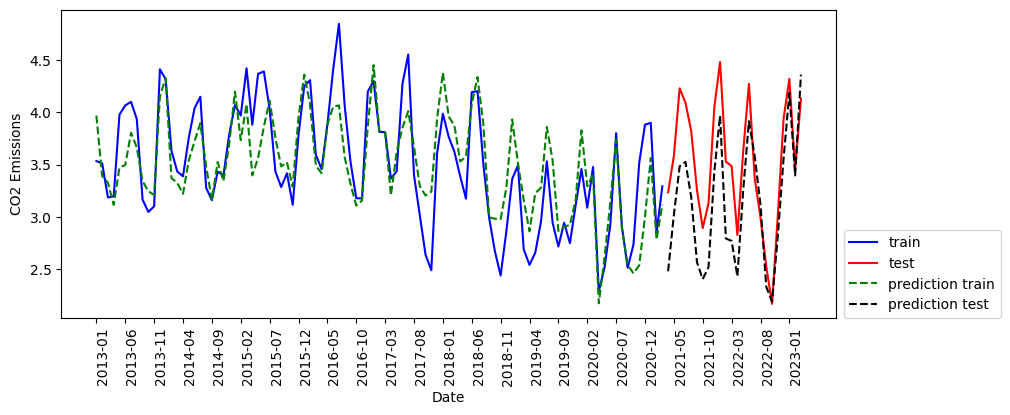

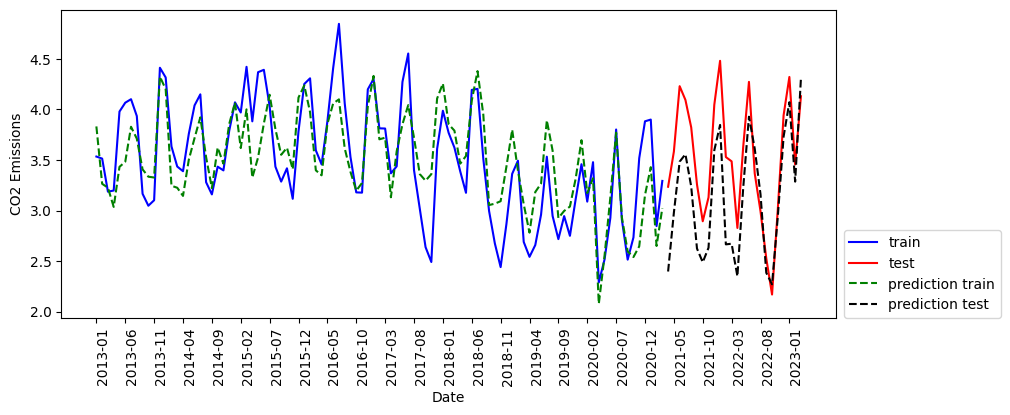

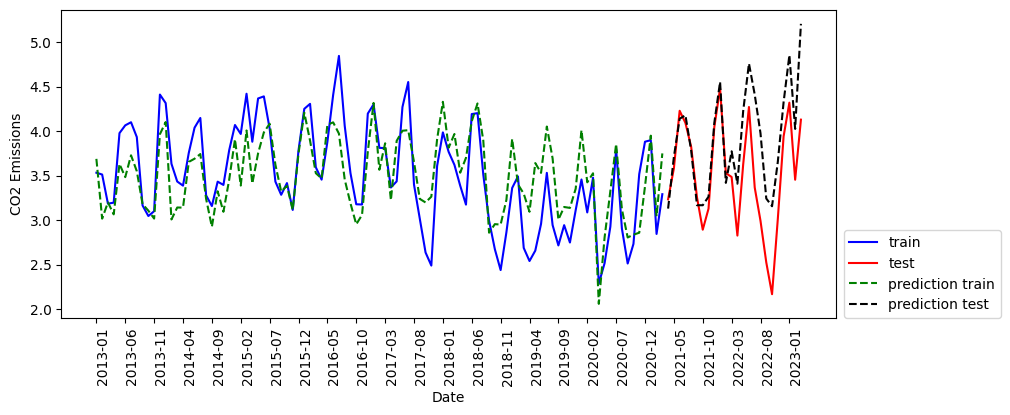

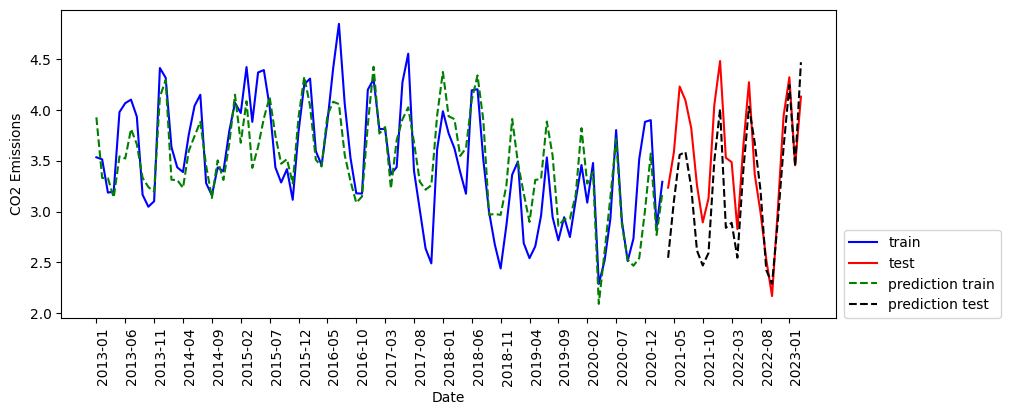

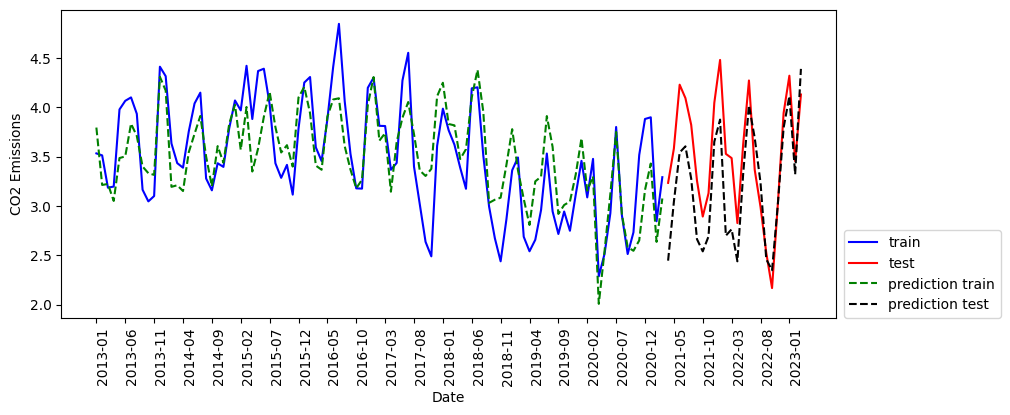

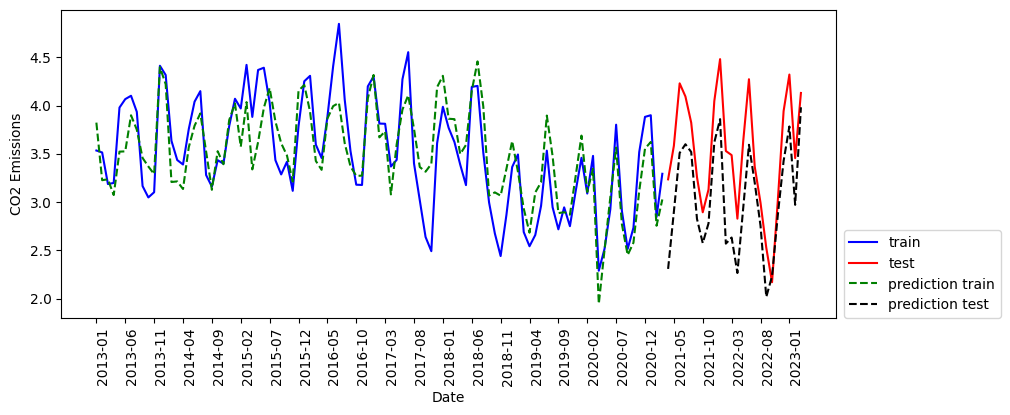

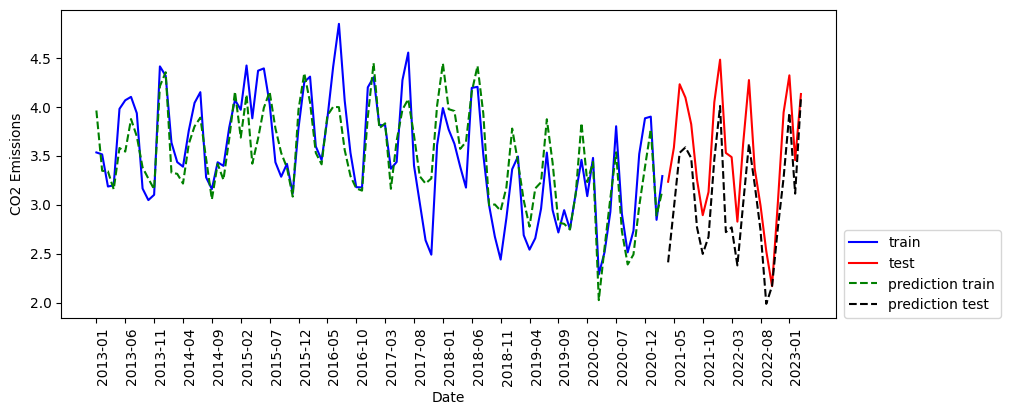

In [92]:
from sklearn.linear_model import LinearRegression

for i in indep:
    eval_on_features(i, y, LinearRegression())

**2.1.b Con Ranom Forest**

Importancias de las características (RandomForestRegressor): [0.48056587 0.45009647 0.06933766]
Test-set R^2: 0.52
Importancias de las características (RandomForestRegressor): [0.51477401 0.48522599]
Test-set R^2: 0.50
Importancias de las características (RandomForestRegressor): [0.2729633  0.63192618 0.09511052]
Test-set R^2: 0.36
Importancias de las características (RandomForestRegressor): [0.08067661 0.45425873 0.41650663 0.04855804]
Test-set R^2: 0.40
Importancias de las características (RandomForestRegressor): [0.09672353 0.47024014 0.43303633]
Test-set R^2: 0.38
Importancias de las características (RandomForestRegressor): [0.08090367 0.42372774 0.49536859]
Test-set R^2: 0.59
Importancias de las características (RandomForestRegressor): [0.06683226 0.41422266 0.03672647 0.48221861]
Test-set R^2: 0.59


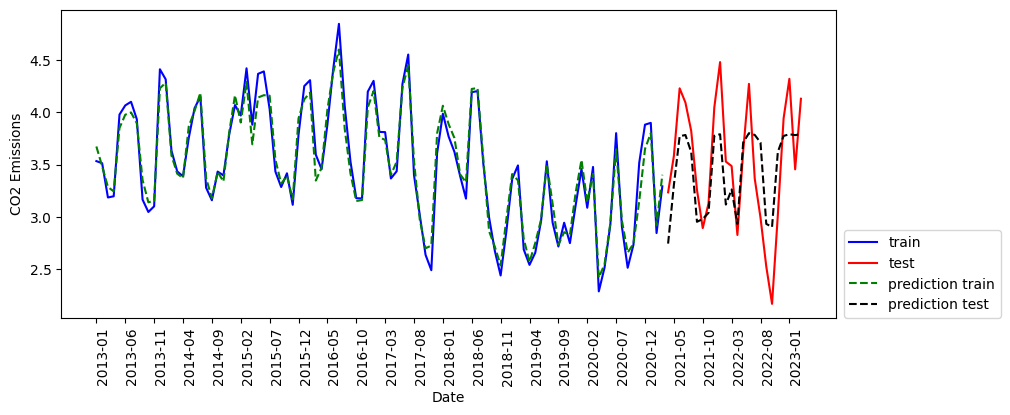

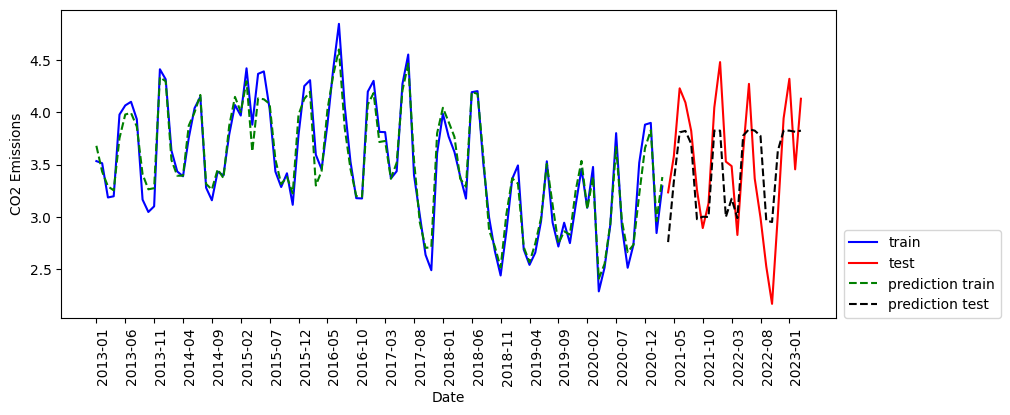

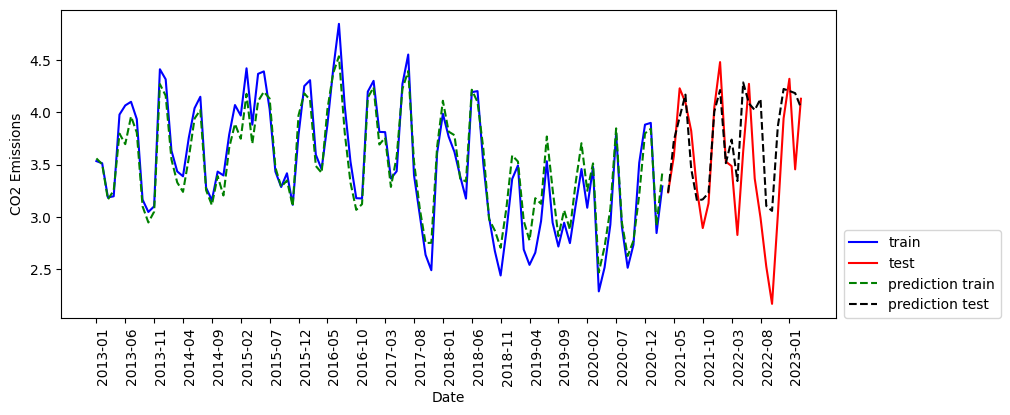

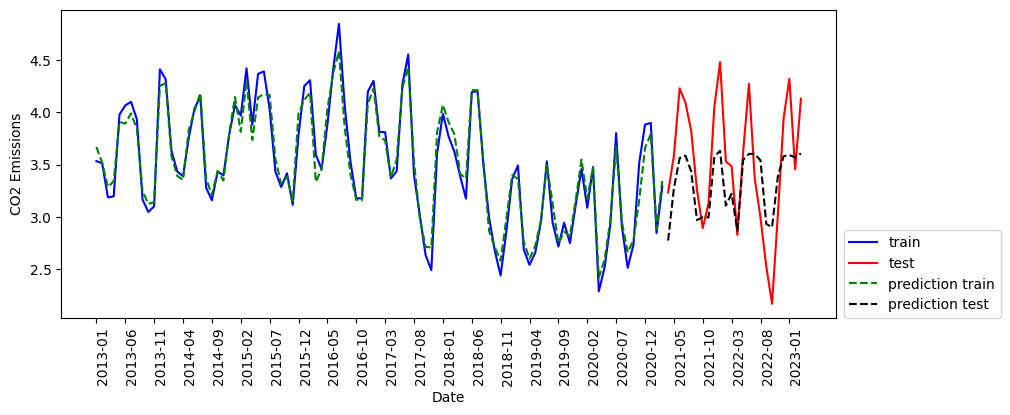

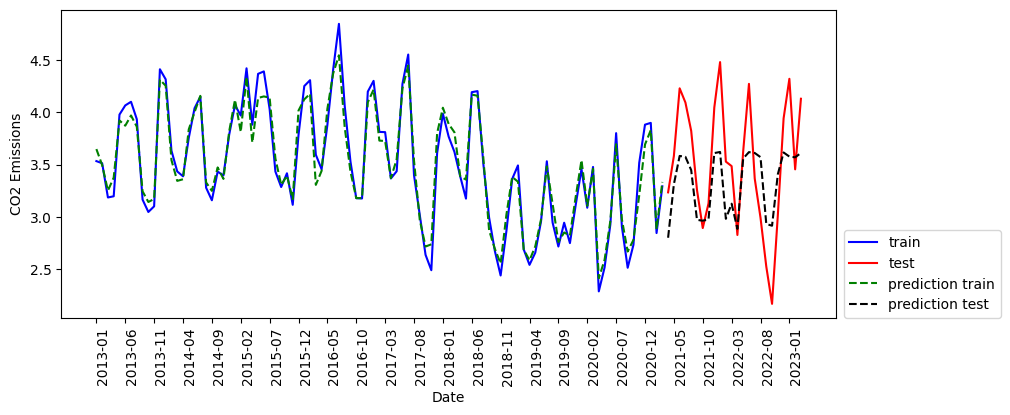

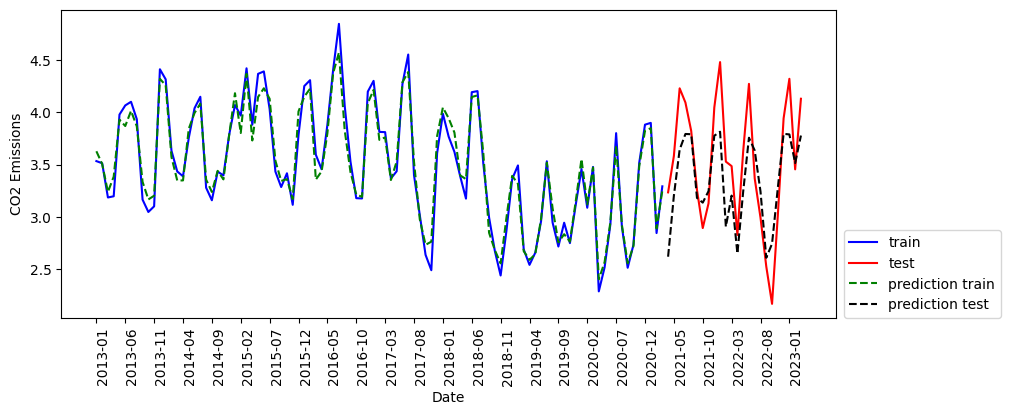

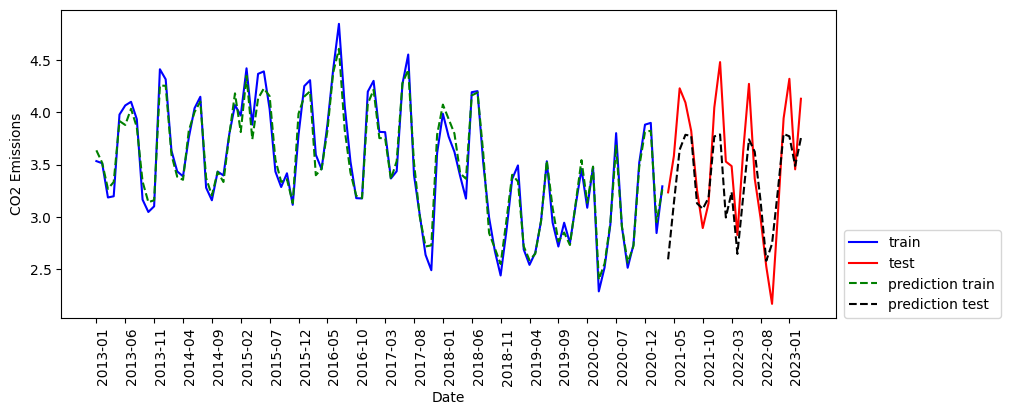

In [115]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)

for i in indep:
    eval_on_features(i, y, regressor)

A partir de la incorporacion de nuevas variables logramos un mejor R2:0.6

El mejor modelo resulto ser unsando un regresor RandomForest con tres variables salientes a partir de seleccion de features:
- EMAE
- Estacionalidad
- Porcentaje de energia renovable
- Generacion total de energia

**Seleccion de Hiperparametros** 

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_emae_gene_renov, y, test_size=0.3)

random_forest = RandomForestRegressor()

params = {
    'n_estimators' : [50,100,200],
    'max_features': [2,3],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 6, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [84]:
%%time
#Entrenamos el modelo 
rf_model=grid_random_forest.fit(X_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


c:\Users\Bruno\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


36 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bruno\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bruno\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\Bruno\miniconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Bruno\miniconda3\lib\site-

CPU times: total: 469 ms
Wall time: 6.85 s


In [85]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='poisson', max_features=3)

In [86]:
grid_random_forest.best_params_

{'criterion': 'poisson', 'max_features': 3, 'n_estimators': 100}

In [116]:
random_forest_nuevo = RandomForestRegressor(criterion='poisson', max_features= 3,n_estimators=100) #Instanciamos el modelo

Importancias de las características (RandomForestRegressor): [0.0717998  0.42726573 0.50093447]
Test-set R^2: 0.58


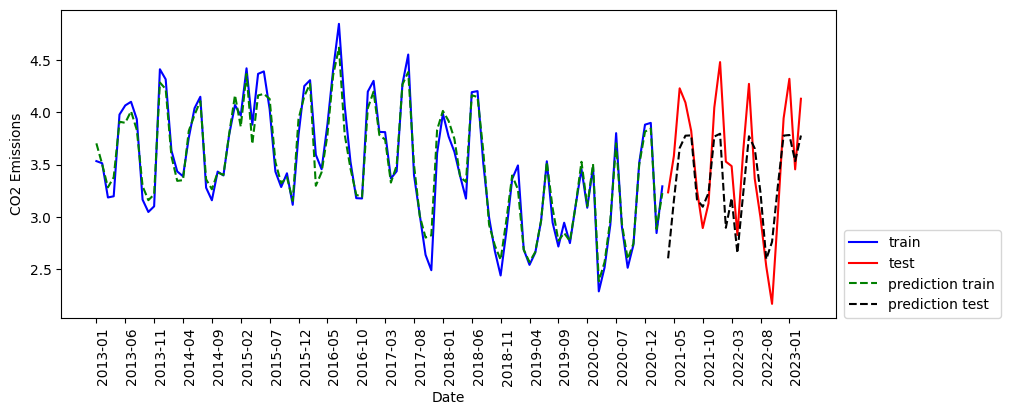

In [117]:
eval_on_features(X_emae_gene_renov, y, random_forest_nuevo)

**Evaluamos el desempeño del modelo**

- Error cuadratico medio (MSE)
- Raiz de error cuadratico medio (RMSE)
- Error absoluto medio (MAE)

- R2-ajustado

In [90]:
y_pred = rf_model.predict(X_test)
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Mean Absolute Error: 0.2821960285962746
Mean Squared Error: 0.1154101891790968
Root Mean Squared Error: 0.33972075176399924


**Conclusión**

En resumen, este trabajo se centró en desarrollar un modelo de regresión para estimar las emisiones de dióxido de carbono provenientes de la generación eléctrica en Argentina. Se exploraron diversas combinaciones de variables, incluyendo la demanda de energía, el estimador mensual de actividad económica (EMAE), la temperatura media del Gran Buenos Aires y una variable dummy que captura la estacionalidad mensual. Utilizando el coeficiente de determinación (R2) como métrica de evaluación, se identificó que el modelo más efectivo para proyectar las emisiones está compuesto por los regresores EMAE, demanda de energía y la variable dummy de estacionalidad.

Adicionalmente, se llevó a cabo la optimización del modelo mediante la selección de hiperparámetros clave. En este proceso, se exploraron y ajustaron tres hiperparámetros críticos: la cantidad de estimadores, la cantidad de features y el criterio de seleccion. 

Sin embargo, a pesar de que visualmente se ve un buen ajuste de las predicciones tanto en el tran como test, el modelo resultante muestra falta de poder explicativo si analiuzamos el r2(0,32).